In [1]:
import pandas as pd
from IPython.display import Image

# Чтение и обработка больших файлов CSV

План урока

- Работа с большими файлами. Скачиваем файлы с сайта grouplens.org
- Использование параметра chunksize при открытии файла csv
- chunksize + функция enumerate
- Использование iterrows
- Работаем с файлами movies.csv

## Работа с большими файлами 

## Скачиваем файлы с сайта grouplens.org

    ссылка https://grouplens.org/datasets/movielens/latest/

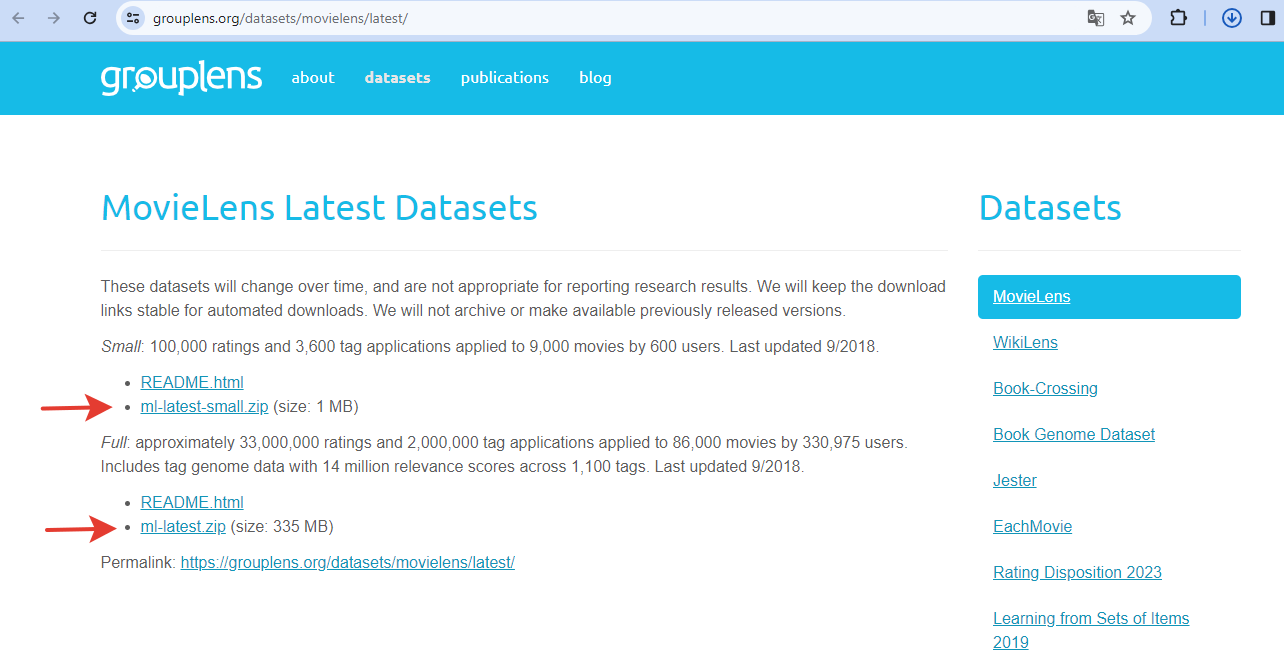

In [2]:
display(Image(filename='files/MovieLens/screen.png'))

## Обычное открытие файла CSV

In [3]:
df = pd.read_csv('files/test.csv')
df

,Name,Age,City
0,Anna,29,Moscow
1,John,21,New-York
2,Ivan,18,Moscow
3,Mike,32,Los-Angeles
4,Alex,30,New-York
5,Mary,31,Los-Angeles


# Использование параметра chunksize при открытии файла csv

    Chunk на английском языке означает "кусок"
    Сhunksize - это размер куска (т.е. количество строк в куске)

#### Если мы указываем параметр chunksize в методе read_csv(), то получаем Объект TextFileReader, по которому можно итерироваться, получая за одну итерацию только часть файла - (chunk) порцию строк в виде объекта DataFrame. Количество строк в такой порции соответсвует числу, переданному в параметре chunksize.

## Параметр chunksize в методе .read_csv() + функция enumerate()

In [4]:
# создание объекта TextFileReader
df_chunks1 = pd.read_csv('files/test.csv', chunksize=2)
type(df_chunks1)

pandas.io.parsers.readers.TextFileReader

#### Функция enumerate() принимает два параметра: iterable и start.

 - iterable — это итерируемый объект (список, кортеж и т.д.), который будет возвращен в виде пронумерованного объекта (объекта enumerate)
 - start — это начальный индекс для возвращаемого объекта enumerate. Значение по умолчанию равно 0, поэтому, если вы опустите этот параметр, в качестве первого индекса будет использоваться 0.

In [5]:
# Функция enumerate() принимает два параметра: iterable и start.
# iterable — это итерируемый объект, а start — это начальный индекс для возвращаемого объекта enumerate


for i, chunk in enumerate(df_chunks1, 1):
    print(f'Chunk #{i}', type(chunk), '\n')
    display(chunk)
    print()

Chunk #1 <class 'pandas.core.frame.DataFrame'> 



,Name,Age,City
0,Anna,29,Moscow
1,John,21,New-York



Chunk #2 <class 'pandas.core.frame.DataFrame'> 



,Name,Age,City
2,Ivan,18,Moscow
3,Mike,32,Los-Angeles



Chunk #3 <class 'pandas.core.frame.DataFrame'> 



,Name,Age,City
4,Alex,30,New-York
5,Mary,31,Los-Angeles


# Метод .get_chunk()

In [6]:
# создадим еще раз объект TextFileReader, сохранив его в переменную df_chunk2
df_chunks2 = pd.read_csv('files/test.csv', chunksize=2)

In [7]:
# получим первый кусок
df_chunks2.get_chunk()

,Name,Age,City
0,Anna,29,Moscow
1,John,21,New-York


In [8]:
# получим второй кусок
df_chunks2.get_chunk()

,Name,Age,City
2,Ivan,18,Moscow
3,Mike,32,Los-Angeles


In [9]:
# получим третий (последний) кусок
df_chunks2.get_chunk()

,Name,Age,City
4,Alex,30,New-York
5,Mary,31,Los-Angeles


In [10]:
# получим ошибку, обратившись в четвертый раз (StopIteration )
df_chunks2.get_chunk()

StopIteration: 

In [11]:
# создадим еще раз объект TextFileReader, сохранив его в переменную df_chunk3
df_chunks3 = pd.read_csv('files/test.csv', chunksize=2)
df_chunks3.get_chunk(3)

,Name,Age,City
0,Anna,29,Moscow
1,John,21,New-York
2,Ivan,18,Moscow


In [12]:
# получим второй кусок, размер согласно параметру chunksize=2
df_chunks3.get_chunk()

,Name,Age,City
3,Mike,32,Los-Angeles
4,Alex,30,New-York


In [13]:
# получим третий (оставшийся) кусок
df_chunks3.get_chunk()

,Name,Age,City
5,Mary,31,Los-Angeles


## Использование iterrows

#### Метод iterrows выдает нам пару (index, series), где первый элемент - это индекс строки, а второй - это объект Series со значениями соответсвующей строки. 

In [14]:
df_chunks4 = pd.read_csv('files/test.csv', chunksize=2)
for i, chunk in enumerate(df_chunks4, 1):
    print(f'CHUNK #{i}', '\n')
    for index, row in chunk.iterrows():
        print(f'ROW INDEX: {index}\n', row, '\n', sep='\n')

CHUNK #1 

ROW INDEX: 0

Name      Anna
Age         29
City    Moscow
Name: 0, dtype: object


ROW INDEX: 1

Name        John
Age           21
City    New-York
Name: 1, dtype: object


CHUNK #2 

ROW INDEX: 2

Name      Ivan
Age         18
City    Moscow
Name: 2, dtype: object


ROW INDEX: 3

Name           Mike
Age              32
City    Los-Angeles
Name: 3, dtype: object


CHUNK #3 

ROW INDEX: 4

Name        Alex
Age           30
City    New-York
Name: 4, dtype: object


ROW INDEX: 5

Name           Mary
Age              31
City    Los-Angeles
Name: 5, dtype: object




# Работаем с файлами movies.csv

In [15]:
# создадим две переменные, в каждой из которых пропишем путь к двум различным файлам

path_to_file_1='files/MovieLens/ml-latest-small/movies.csv'
path_to_file_2='files/MovieLens/ml-latest/movies.csv'

In [16]:
# определяем количество кусков в первом (маленьком) файле:
df_chunks_1 = pd.read_csv(path_to_file_1, chunksize=1000)
for i, chunk in enumerate(df_chunks_1, 1):
    pass
print("FILE 1: total number of chunks is", i)

FILE 1: total number of chunks is 10


In [17]:
# определяем количество кусков во втором (большом) файле:
df_chunks_2 = pd.read_csv(path_to_file_2, chunksize=1000)
for i, chunk in enumerate(df_chunks_2, 1):
    pass
print("FILE 2: total number of chunks is", i)

FILE 2: total number of chunks is 87


### Задача: 
### из большого файла movies.csv выбрать фильмы жанра Horror и записать в отдельный файл

### Алгоритм работы

1. Отрываем файл movies.csv в переменную df_chunks_file2, указав параметр chunksize=1000
2. Создаем пустой список в переменной query_list
3. Создаем пустой DataFrame в переменной query
4. Итерируемся по объекту TextFileReader в переменной df_chunks_file2, сохраняя в переменной query результат обработки куска, который затем добавляем в список query_list с помощью метода append. Обработка куска представляет собой поиск строковых значений в столбце genres, содержажих слово 'Horror'.
5. На выходе из цикла получаем список query_list, каждый элемент которого это отдельный DataFrame. 
6. Соединяем все элементы в один DataFrame с помощью функции concat и сохраняем его в переменную df_horrors (ставим параметр ignore_index=True, чтобы отменить индексы строк изначального файла)
7. Записываем результат обработки в файл horrors.csv, который сохраняем в ту же папку, где лежал изначальный файл.

In [18]:
df_chunks_file2=pd.read_csv('files/MovieLens/ml-latest/movies.csv', chunksize=1000)
# cоздаем пустой список и пустой DataFrame
query_list = []
query = pd.DataFrame()
# итерируемся по объекту TextFileReader, сохраняя в переменной query результат обработки
# результат обработки после каждой итерации добавляем в список query_list
for chunk in df_chunks_file2:
    query = chunk[chunk['genres'].str.contains('Horror')]
    query_list.append(query)
    
# на выходе из цикла мы получаем список query_list, каждый элемент которого это отдельный DataFrame.
# print(type(query_list), type(query_list[0]), sep='\n')    
# соединяем все элементы списка в один DataFrame с помощью функции concat 
df_horrors=pd.concat(query_list, ignore_index=True)
# записываем результат обработки в файл horrors.csv
df_horrors.to_csv('files/MovieLens/ml-latest/horrors.csv')

In [19]:
# откроем созданный csv-файл с фильмами жанра Horror
df_h=pd.read_csv('files/MovieLens/ml-latest/horrors.csv',index_col=0)

In [20]:
# посмотрим на первые 5 строк
df_h.head()

,movieId,title,genres
0,12,Dracula: Dead and Loving It (1995),Comedy|Horror
1,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
2,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
3,92,Mary Reilly (1996),Drama|Horror|Thriller
4,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance


In [21]:
# посмотрим на последние 5 строк
df_h.tail()

,movieId,title,genres
8565,288913,Cabin Girl (2023),Horror|Thriller
8566,288931,V for Vengeance (2022),Action|Horror
8567,288943,The Mount 2 (2023),Horror
8568,288957,Ballet Of Blood (2016),Horror
8569,288971,Ouija Japan (2021),Action|Horror


In [22]:
# количество отображаемых строк можно менять
df_h.head(7)

,movieId,title,genres
0,12,Dracula: Dead and Loving It (1995),Comedy|Horror
1,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
2,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
3,92,Mary Reilly (1996),Drama|Horror|Thriller
4,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance
5,152,"Addiction, The (1995)",Drama|Horror
6,177,Lord of Illusions (1995),Horror
